# 6.6 - Sourcing & Analyzing Time Series Data

### Contents list:

1. Data source & definitions
2. Importing your libraries and data
3. Subsetting, wrangling, and cleaning time-series data
4. Time series analysis: decomposition
5. Testing for stationarity
6. Stationarizing the non-stationary data
7. Checking autocorrelations

### 1. Data source & definitions

### Dataset 1: Global Economic Indicators
- https://data.nasdaq.com/databases/ECD#anchor-economic-indicators-data-edia-ecd-
- Global macroeconomic and financial market indicators data. Data comes from official sources, such as IMF, World Bank collections, central banks, statistical offices and other government bodies.

### Dataset 2: World Development Indicators
- https://datacatalog.worldbank.org/search/dataset/0037712/World-Development-Indicators
- This dataset summarizes 100 different indicators that impact global development, health and poverty. It consolidates information from official sources across the world from 1960 - 2023 and summarizes at the national and regional levels.

### Definitions for relevant variables


#### DATASET 1:

**US median Income:** Median income by month for United States households.


#### DATASET 2:

**Life expectancy at birth, total (years):** The number of years a newborn infant would live if prevailing patterns of mortality at the time of its birth were to stay the same throughout its life.

**Renewable energy consumption (% of total final energy consumption):** The share of renewable energy in total final energy consumption.

**Mortality rate, infant (per 1,000 live births):** The number of infants dying before reaching one year of age, per 1,000 live births in a given year.

**Urban population (% of total population):** Refers to people living in urban areas as defined by national statistical offices. The data are collected and smoothed by United Nations Population Division.

### 1. Importing libraries and data

In [1]:
# import libraries, hide warnings and update plot stylings

import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import os
import warnings

warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [2]:
# configure API key

quandl.ApiConfig.api_key = 'fG9Ly4tyhsQ36XV4FirS'

In [3]:
# importing time series data for monthly median household income

df_medinc = quandl.get_table('EDIA/ECD', series_id='63456')

In [4]:
# declare path as variable

path = r'/Users/dekstrom/Documents/CareerFoundry/Achievement 6'

In [5]:
# import df_reduced_columns.csv as main dataframe

df = pd.read_csv(os.path.join(path,'01 Data','Prepared Data','df_reduced_columns.csv'), index_col = False)

### 2. Subsetting, wrangling, and cleaning time-series data

#### US median household income

In [6]:
# check head

df_medinc.head()

,series_id,country_code,indicator_code,identifier,description,units,frequency,date,value
None,,,,,,,,,
0,63456,US,034,US.SP1.034.M.01,United States: Median Household Income ($) [US...,bln USD,M,2019-09-01,18474.4
1,63456,US,034,US.SP1.034.M.01,United States: Median Household Income ($) [US...,bln USD,M,2019-08-01,18423.6
2,63456,US,034,US.SP1.034.M.01,United States: Median Household Income ($) [US...,bln USD,M,2019-07-01,18328.6
3,63456,US,034,US.SP1.034.M.01,United States: Median Household Income ($) [US...,bln USD,M,2019-06-01,18310.5
4,63456,US,034,US.SP1.034.M.01,United States: Median Household Income ($) [US...,bln USD,M,2019-05-01,18277.0


In [7]:
# check shape

df_medinc.shape

(57, 9)

In [8]:
# check columns

df_medinc.columns

Index(['series_id', 'country_code', 'indicator_code', 'identifier',
       'description', 'units', 'frequency', 'date', 'value'],
      dtype='object')

In [9]:
# redefine with relevant columns

df_medinc = df_medinc[['date','value']]
df_medinc.head()

,date,value
None,,
0,2019-09-01,18474.4
1,2019-08-01,18423.6
2,2019-07-01,18328.6
3,2019-06-01,18310.5
4,2019-05-01,18277.0


In [10]:
# check type

type(df_medinc)

pandas.core.frame.DataFrame

In [11]:
# create datetime column and set as index

from datetime import datetime

df_medinc['datetime'] = pd.to_datetime(df_medinc['date'])
df_medinc = df_medinc.set_index('datetime')
df_medinc.drop(['date'], axis=1, inplace=True)
df_medinc.head()

,value
datetime,
2019-09-01,18474.4
2019-08-01,18423.6
2019-07-01,18328.6
2019-06-01,18310.5
2019-05-01,18277.0


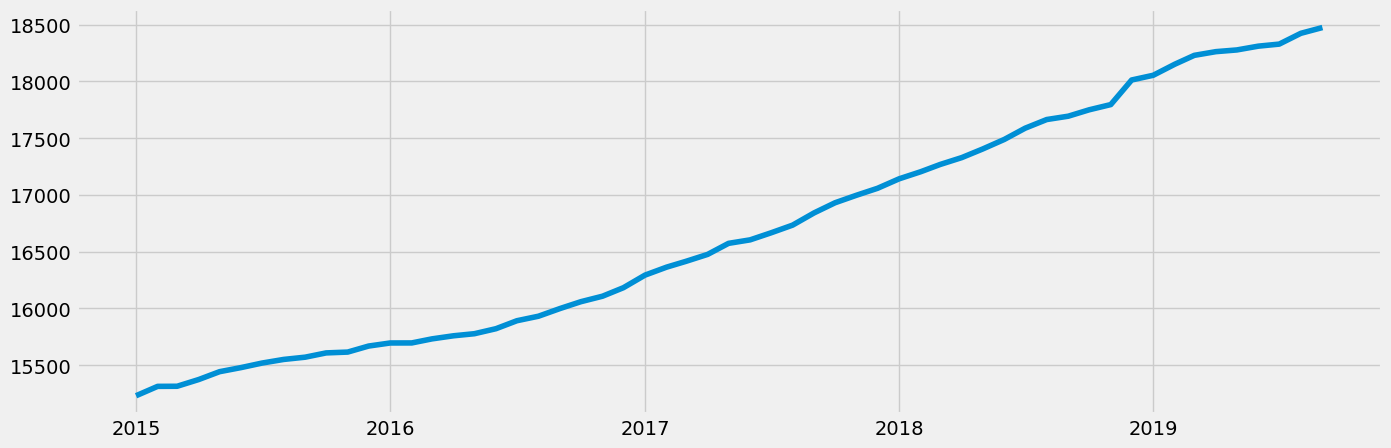

In [12]:
# plot df_medinc

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_medinc)

In [13]:
# check for missing values

df_medinc.isnull().sum() 

value    0
dtype: int64

In [14]:
# check for duplicates

dups = df_medinc.duplicated()
dups.sum()

0

#### Life expectancy time series

In [57]:
# check df

df.head()

,Country Name,Country Code,Year,Income Grouping,Top religion,National income,Agricultural land %,Alternative & nuclear energy use %,Birth rate,CO2 emissions,...,Internet users %,Land area,Life expectancy at birth,Military expenditure %,Infant mortality rate,Population growth,Population,Renewable electricity output %,Renewable energy consumption %,Urban population %
0,Afghanistan,AFG,1960,NaN,Islam,NaN,NaN,NaN,50.340,NaN,...,NaN,NaN,32.535,NaN,NaN,NaN,8622466.0,NaN,NaN,8.401
1,Afghanistan,AFG,1961,NaN,Islam,NaN,57.878356,NaN,50.443,NaN,...,NaN,652230.0,33.068,NaN,NaN,1.925952,8790140.0,NaN,NaN,8.684
2,Afghanistan,AFG,1962,NaN,Islam,NaN,57.955016,NaN,50.570,NaN,...,NaN,652230.0,33.547,NaN,NaN,2.014879,8969047.0,NaN,NaN,8.976
3,Afghanistan,AFG,1963,NaN,Islam,NaN,58.031676,NaN,50.703,NaN,...,NaN,652230.0,34.016,NaN,228.9,2.078997,9157465.0,NaN,NaN,9.276
4,Afghanistan,AFG,1964,NaN,Islam,NaN,58.116002,NaN,50.831,NaN,...,NaN,652230.0,34.494,NaN,225.1,2.139651,9355514.0,NaN,NaN,9.586


In [58]:
# create subset for Life expectancy time series

df_lifexp = df[['Year','Life expectancy at birth']][df['Life expectancy at birth'].notna()]

In [59]:
# aggregate Life expectancy by year

df_lifexp = df_lifexp.groupby('Year').agg('mean').reset_index()

In [60]:
# check result

df_lifexp.head()

,Year,Life expectancy at birth
0,1960,54.338136
1,1961,54.864011
2,1962,55.351248
3,1963,55.637641
4,1964,56.261031


In [61]:
# create datetime column in Year format and set as index

from datetime import datetime

df_lifexp['datetime'] = pd.to_datetime(df_lifexp['Year'], format='%Y')
df_lifexp = df_lifexp.set_index('datetime')
df_lifexp.drop(['Year'], axis=1, inplace=True)
df_lifexp.head()

,Life expectancy at birth
datetime,
1960-01-01,54.338136
1961-01-01,54.864011
1962-01-01,55.351248
1963-01-01,55.637641
1964-01-01,56.261031


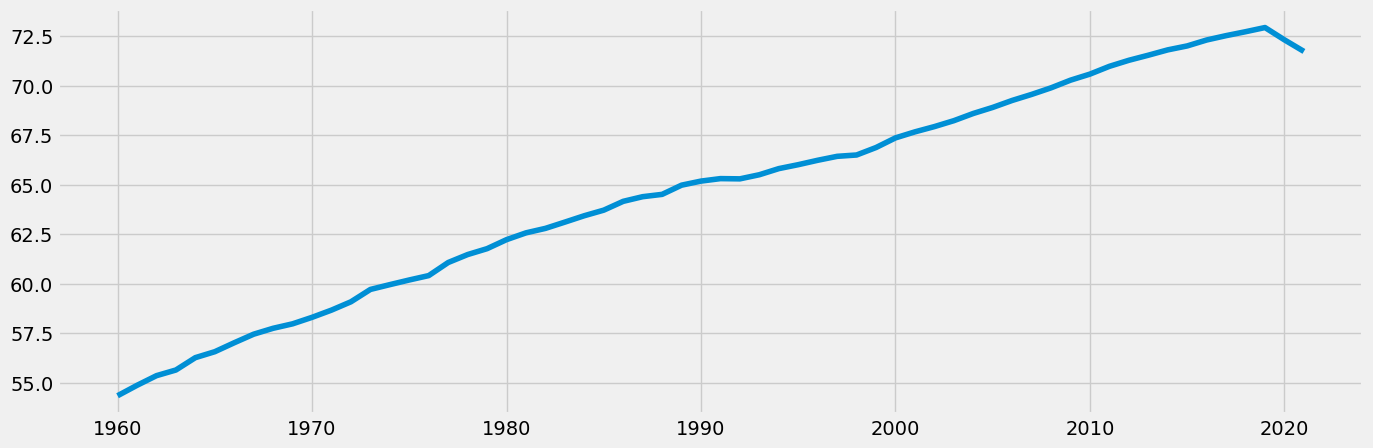

In [62]:
# plot df_lifexp

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_lifexp)

#### Renewable energy consumption % time series

In [63]:
# create subset for Renewable energy consumption % time series

df_renew = df[['Year','Renewable energy consumption %']][df['Renewable energy consumption %'].notna()]

In [64]:
# aggregate Renewable energy consumption % by year

df_renew = df_renew.groupby('Year').agg('mean').reset_index()
df_renew.head()

,Year,Renewable energy consumption %
0,1990,31.908932
1,1991,31.977101
2,1992,32.428365
3,1993,32.524423
4,1994,32.503942


In [65]:
# create datetime column in Year format and set as index

from datetime import datetime

df_renew['datetime'] = pd.to_datetime(df_renew['Year'], format='%Y')
df_renew = df_renew.set_index('datetime')
df_renew.drop(['Year'], axis=1, inplace=True)
df_renew.head()

,Renewable energy consumption %
datetime,
1990-01-01,31.908932
1991-01-01,31.977101
1992-01-01,32.428365
1993-01-01,32.524423
1994-01-01,32.503942


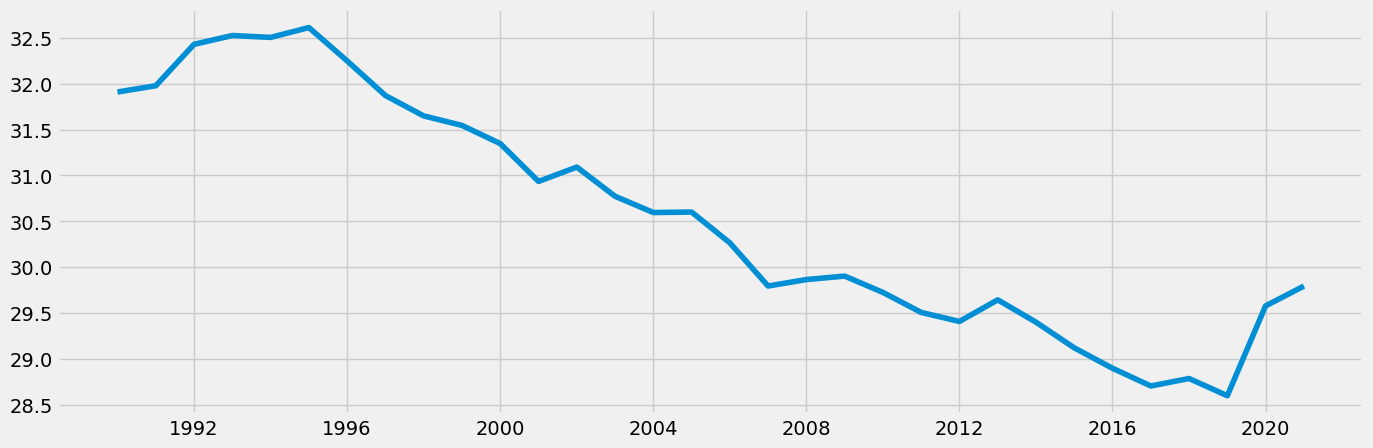

In [66]:
# plot df_renew

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_renew)

#### Infant mortality rate time series

In [67]:
# create subset for Infant mortality rate time series

df_infmort = df[['Year','Infant mortality rate']][df['Infant mortality rate'].notna()]

In [68]:
# aggregate Infant mortality rate by year

df_infmort = df_infmort.groupby('Year').agg('mean').reset_index()
df_infmort.head()

,Year,Infant mortality rate
0,1960,98.122222
1,1961,95.738983
2,1962,93.710924
3,1963,95.325806
4,1964,94.282031


In [69]:
# create datetime column in Year format and set as index

from datetime import datetime

df_infmort['datetime'] = pd.to_datetime(df_infmort['Year'], format='%Y')
df_infmort = df_infmort.set_index('datetime')
df_infmort.drop(['Year'], axis=1, inplace=True)
df_infmort.head()

,Infant mortality rate
datetime,
1960-01-01,98.122222
1961-01-01,95.738983
1962-01-01,93.710924
1963-01-01,95.325806
1964-01-01,94.282031


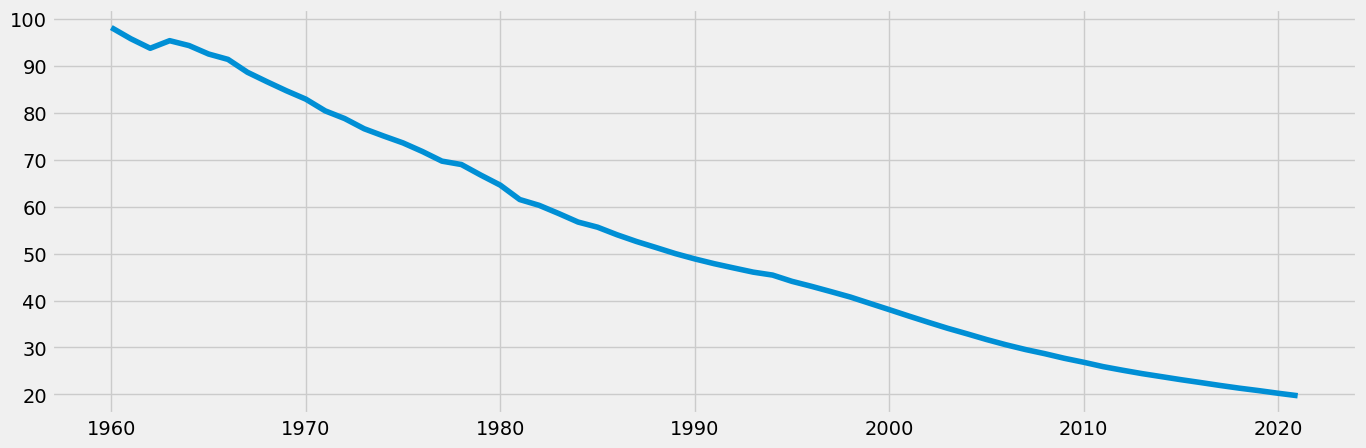

In [70]:
# plot df

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_infmort)

#### Urban population % time series

In [71]:
# create subset for Urban population % time series

df_urbpop = df[['Year','Urban population %']][df['Urban population %'].notna()]

In [72]:
# aggregate Urban population % by year

df_urbpop = df_urbpop.groupby('Year').agg('mean').reset_index()
df_urbpop.head()

,Year,Urban population %
0,1960,37.517270
1,1961,38.043860
2,1962,38.584586
3,1963,39.134795
4,1964,39.695995


In [73]:
# create datetime column in Year format and set as index

from datetime import datetime

df_urbpop['datetime'] = pd.to_datetime(df_urbpop['Year'], format='%Y')
df_urbpop = df_urbpop.set_index('datetime')
df_urbpop.drop(['Year'], axis=1, inplace=True)
df_urbpop.head()

,Urban population %
datetime,
1960-01-01,37.517270
1961-01-01,38.043860
1962-01-01,38.584586
1963-01-01,39.134795
1964-01-01,39.695995


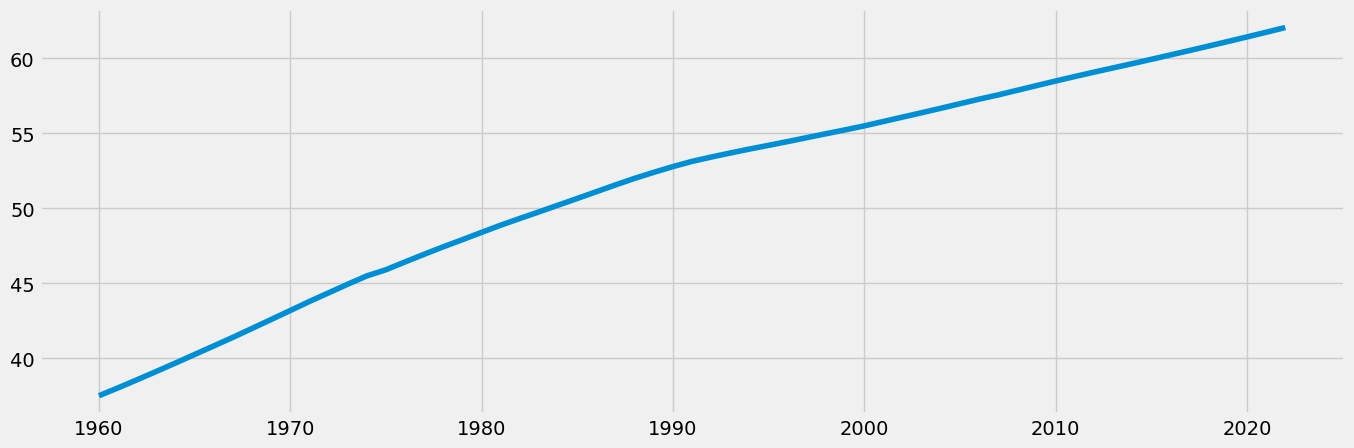

In [74]:
# plot df

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_urbpop)

### 3. Time-series analysis: decomposition

#### US median household income

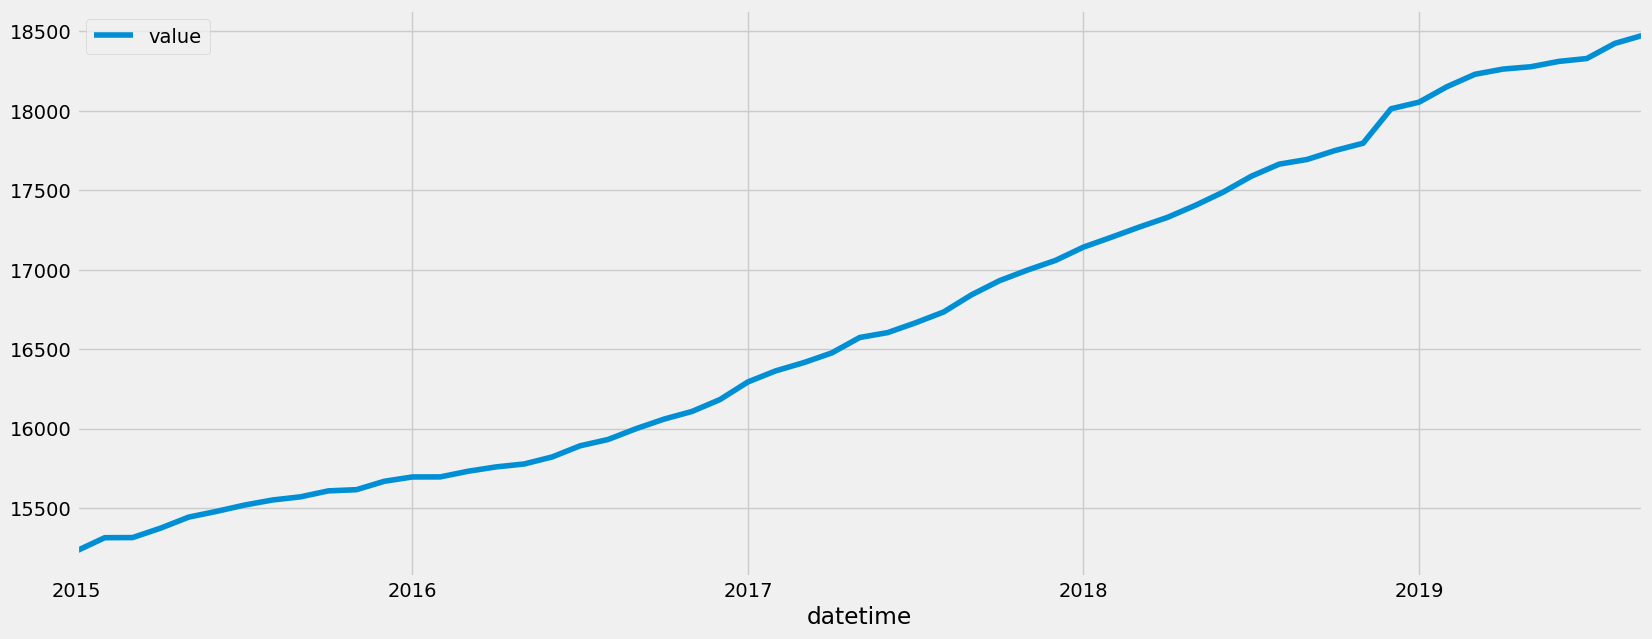

In [19]:
df_medinc.plot()
plt.show()

In [15]:
# decompose the time series using an additive model

decomp_medinc = sm.tsa.seasonal_decompose(df_medinc, model='additive')

In [18]:
decomp_medinc.head()

AttributeError: 'DecomposeResult' object has no attribute 'head'

In [16]:
from pylab import rcParams # define fixed size for all special charts

rcParams['figure.figsize'] = 18, 7

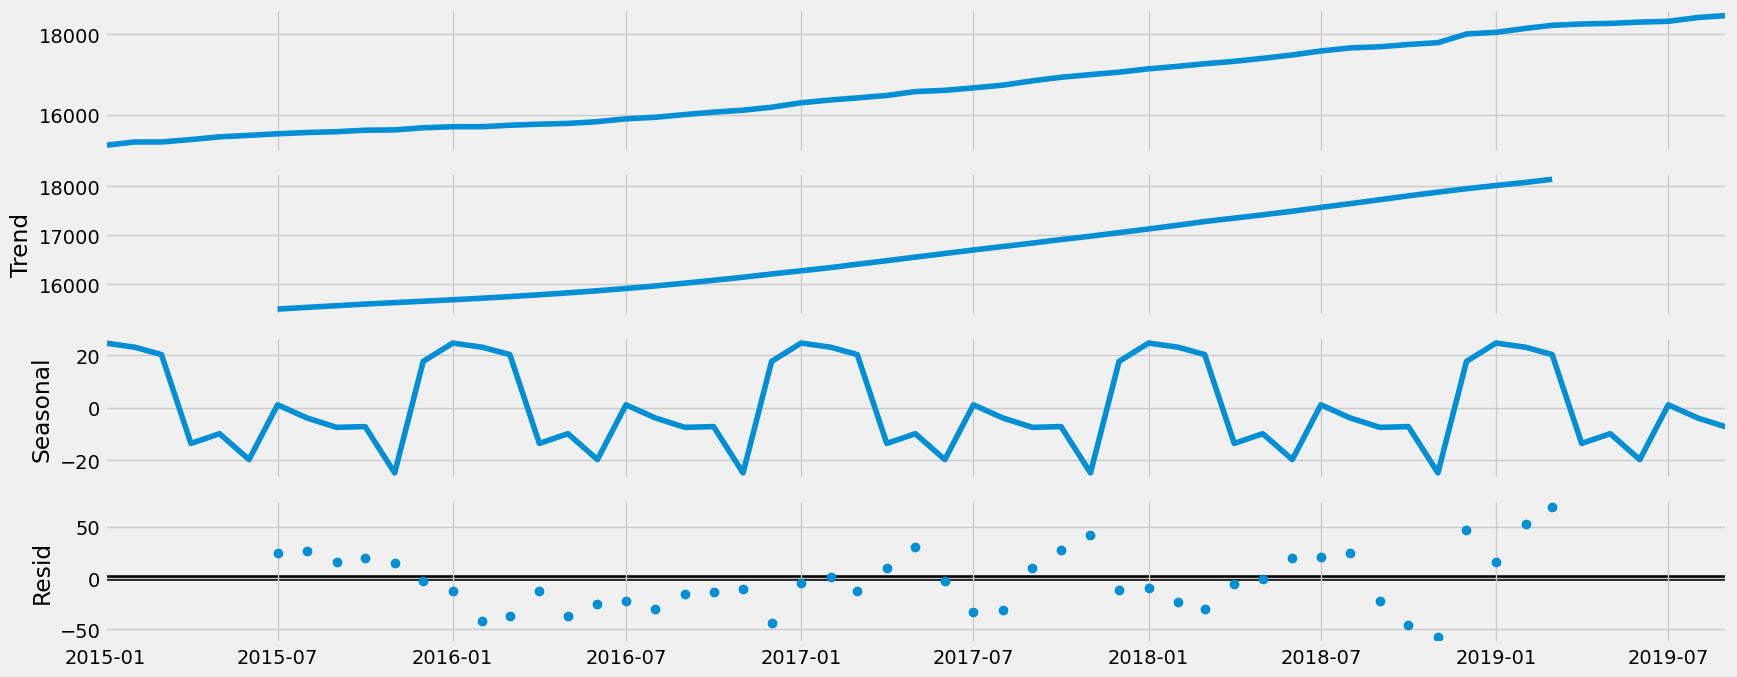

In [24]:
# plot the separate components

decomp_medinc.plot()
plt.gca().invert_xaxis()
plt.show()

### Discussion

Both the residual data points and the difference between the level & the trend represent the amount of noise in the data. There is clear seasonality here in the median monthly household income in the US which is likely due to an increase in bonuses or part time work that picks up in the latter half of each year and carries into the early part of the next year.

#### Life expectancy time series

In [75]:
# decompose the time series using an additive model

decomp_lifexp = sm.tsa.seasonal_decompose(df_lifexp, model='additive')

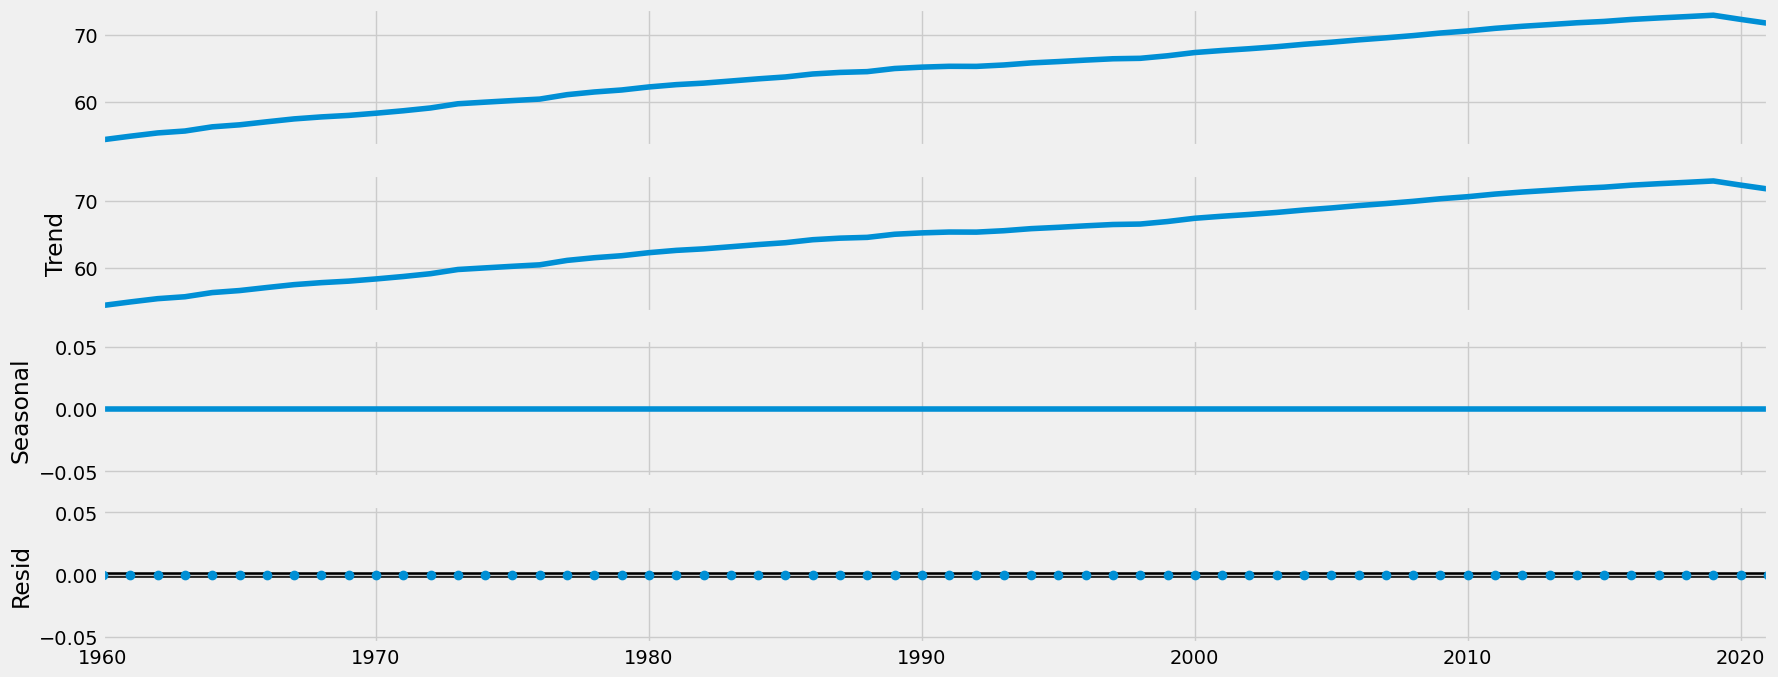

In [77]:
# plot the separate components

decomp_lifexp.plot()
plt.show()

### Discussion

The flat residual and identical trend & level line show there to be nearly no noise in the data. We also have yearly data here so we don't see any seasonality. The dominant trend is a steady increase in life expectancy defined as the number of years a newborn infant would live if prevailing patterns of mortality at the time of its birth were to stay the same throughout its life. The trend dips in 2020 possibly reflecting the devastation brought on by the COVID-19 pandemic.

#### Renewable energy consumption % time series

In [78]:
# decompose the time series using an additive model

decomp_renew = sm.tsa.seasonal_decompose(df_renew, model='additive')

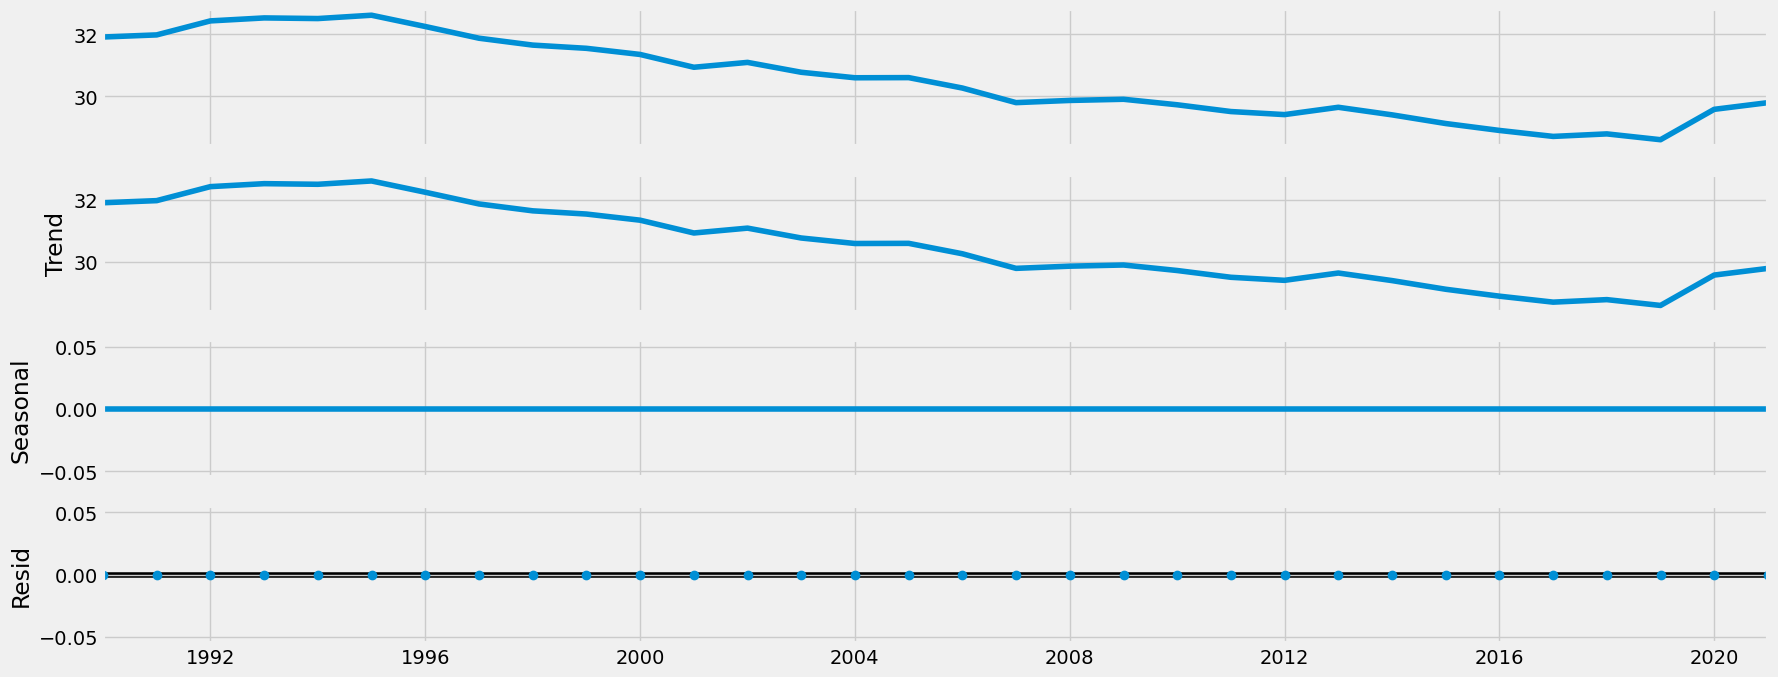

In [79]:
# plot the separate components

decomp_renew.plot()
plt.show()

### Discussion

No noise and no seasonality in the data due to this being yearly data. The dominant trend is a steady decrease renewable energy consumption % since the mid-1990s and then a sharp increase around 2019. My theory for this trend is that it reflects that rapid development of previously underveloped economies who have priortized industrialization over renewable investment. Then in 2019, the global push for sustainability outweighed rapid industrialization such that the overall trend in renewable consumption began to increase.

#### Infant mortality rate time series

In [80]:
# decompose the time series using an additive model

decomp_infmort = sm.tsa.seasonal_decompose(df_infmort, model='additive')

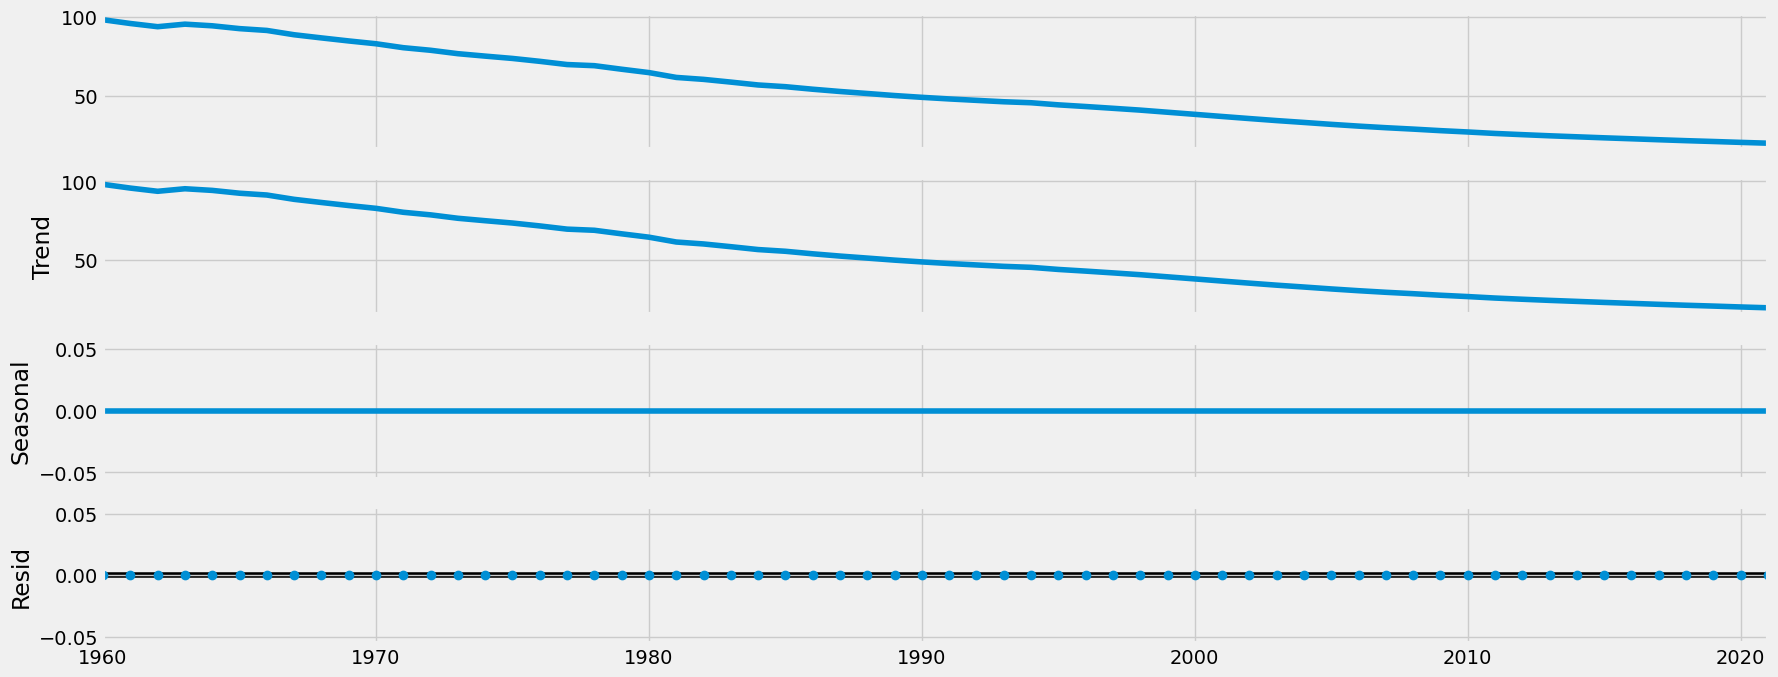

In [81]:
# plot the separate components

decomp_infmort.plot()
plt.show()

### Discussion

No noise and no seasonality in the data due to this being yearly data. The dominant trend is a steady decrease in infant mortality rate. This means that the number of infants per 1000 births to live past 1 has been streadily declining due to global development, disease eradication, poverty reduction and a host of other factors.

#### Urban population % time series

In [82]:
# decompose the time series using an additive model

decomp_urbpop = sm.tsa.seasonal_decompose(df_urbpop, model='additive')

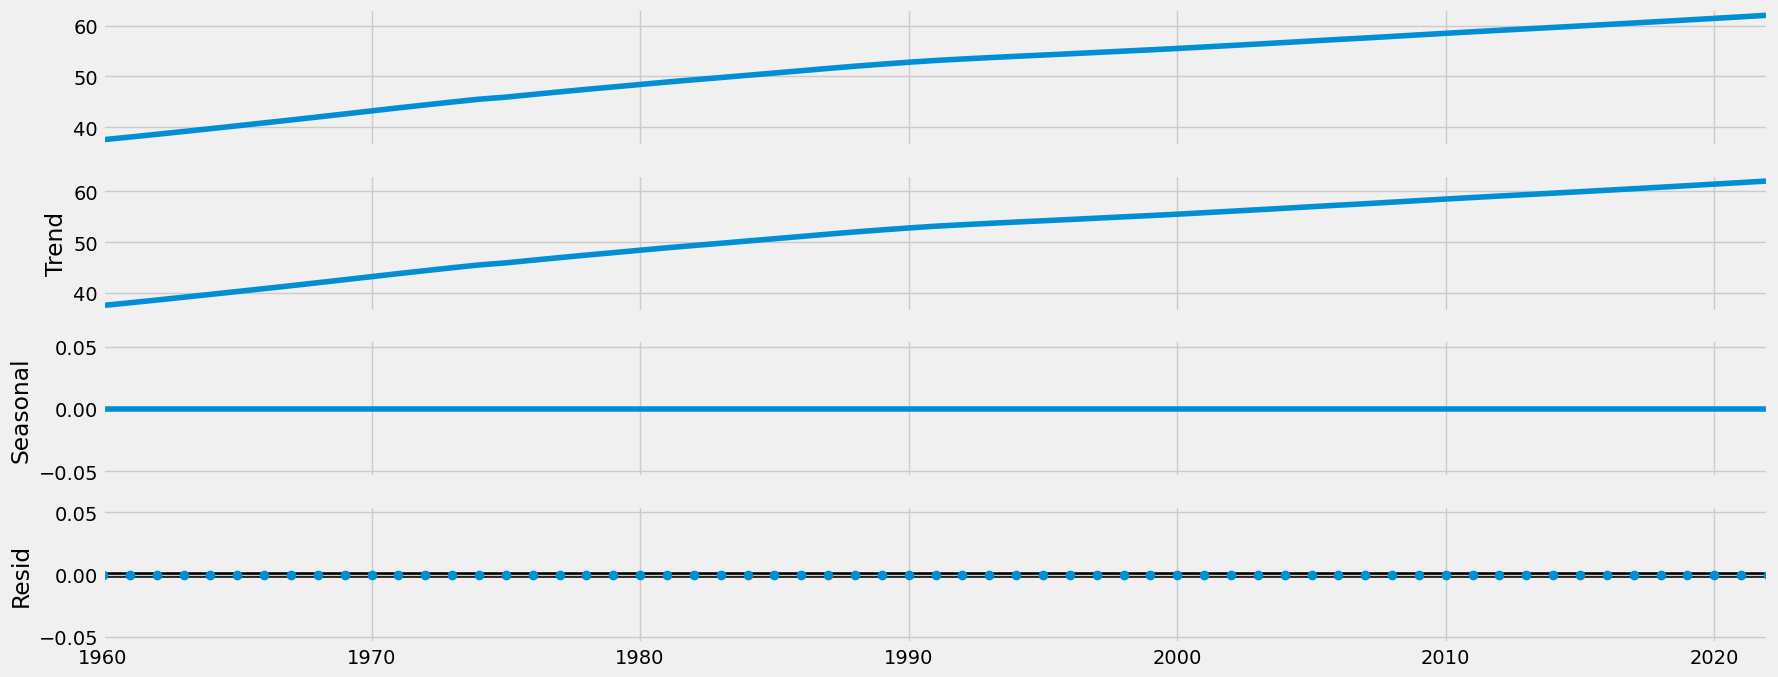

In [83]:
# plot the separate components

decomp_urbpop.plot()
plt.show()

### Discussion

No noise and no seasonality in the data due to this being yearly data. The dominant trend is a steady increase in the percentage of a country's population that lives in urban areas. This reflects the general trend since industrialization of people moving from a rural way of life to an urban one both due to urban development and urban migration.

### 4. Testing for stationarity

#### US median household income

In [39]:
# The adfuller() function will import from the model from statsmodels for the test

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_medinc['value'])

Dickey-Fuller Stationarity test:
Test Statistic                 -2.322720
p-value                         0.164745
Number of Lags Used             0.000000
Number of Observations Used    56.000000
Critical Value (1%)            -3.552928
Critical Value (5%)            -2.914731
Critical Value (10%)           -2.595137
dtype: float64


### Discussion

The test statistic (-2.322720) is larger than the critical value at 5% significance (-2.914731). Therefore we cannot reject the null hypothesis that there is a unit root in the time series and must conclude that our data is non-stationary.

#### Life expectancy time series

In [84]:
# The adfuller() function will import from the model from statsmodels for the test

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_lifexp['Life expectancy at birth'])

Dickey-Fuller Stationarity test:
Test Statistic                 -2.265298
p-value                         0.183404
Number of Lags Used             1.000000
Number of Observations Used    60.000000
Critical Value (1%)            -3.544369
Critical Value (5%)            -2.911073
Critical Value (10%)           -2.593190
dtype: float64


### Discussion

The test statistic (-2.265298) is larger than the critical value at 5% significance (-2.911073). Therefore we cannot reject the null hypothesis that there is a unit root in the time series and must conclude that our data is non-stationary.

#### Renewable energy consumption % time series

In [85]:
# The adfuller() function will import from the model from statsmodels for the test

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_renew['Renewable energy consumption %'])

Dickey-Fuller Stationarity test:
Test Statistic                 -0.934287
p-value                         0.776472
Number of Lags Used             0.000000
Number of Observations Used    31.000000
Critical Value (1%)            -3.661429
Critical Value (5%)            -2.960525
Critical Value (10%)           -2.619319
dtype: float64


### Discussion

The test statistic (-0.934287) is larger than the critical value at 5% significance (-2.960525). Therefore we cannot reject the null hypothesis that there is a unit root in the time series and must conclude that our data is non-stationary.

#### Infant mortality rate time series

In [86]:
# The adfuller() function will import from the model from statsmodels for the test

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_infmort['Infant mortality rate'])

Dickey-Fuller Stationarity test:
Test Statistic                 -4.342796
p-value                         0.000374
Number of Lags Used             0.000000
Number of Observations Used    61.000000
Critical Value (1%)            -3.542413
Critical Value (5%)            -2.910236
Critical Value (10%)           -2.592745
dtype: float64


### Discussion

The test statistic (-4.342796) is smaller than the critical value at 5% significance (-2.910236). Also, we have a p-value of less than .05 which means our test result is significant. Therefore we can reject the null hypothesis that there is a unit root in the time series and can conclude that our data is stationary.

#### Urban population % time series

In [88]:
# The adfuller() function will import from the model from statsmodels for the test

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_urbpop['Urban population %'])

Dickey-Fuller Stationarity test:
Test Statistic                 -1.717987
p-value                         0.421870
Number of Lags Used             2.000000
Number of Observations Used    60.000000
Critical Value (1%)            -3.544369
Critical Value (5%)            -2.911073
Critical Value (10%)           -2.593190
dtype: float64


### Discussion

The test statistic (-1.717987) is larger than the critical value at 5% significance (-2.911073). Therefore we cannot reject the null hypothesis that there is a unit root in the time series and must conclude that our data is non-stationary.

### 5. Stationarizing the non-stationary data

#### US median household income

In [40]:
# the df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

diff_medinc = df_medinc - df_medinc.shift(1)

In [41]:
# remove missing values that occur due to differencing

diff_medinc.dropna(inplace = True)

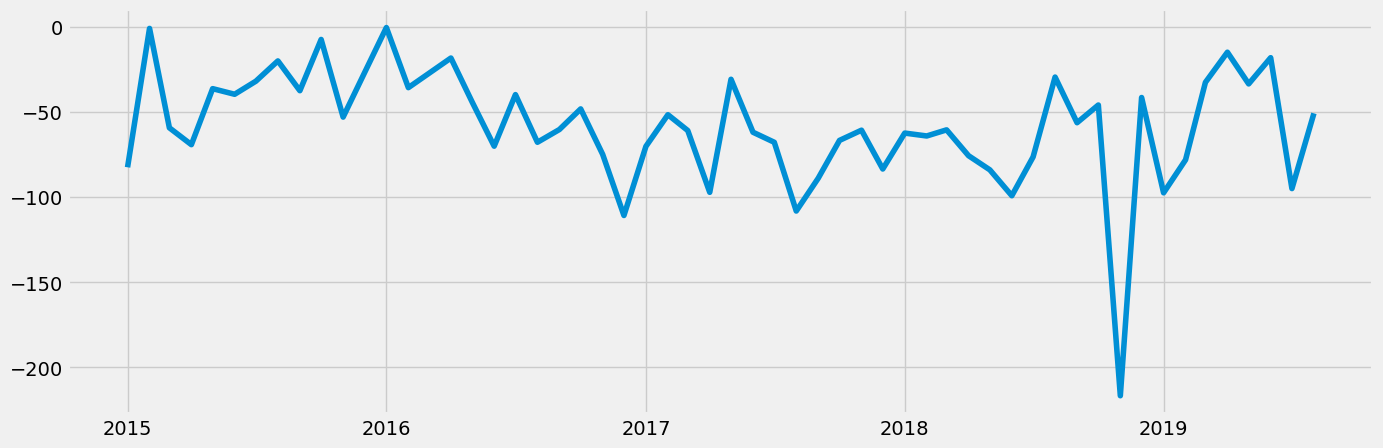

In [43]:
# check impact of differencing on time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(diff_medinc)

In [44]:
# rerun dickey-fuller test

dickey_fuller(diff_medinc)

Dickey-Fuller Stationarity test:
Test Statistic                -6.352487e+00
p-value                        2.590359e-08
Number of Lags Used            0.000000e+00
Number of Observations Used    5.500000e+01
Critical Value (1%)           -3.555273e+00
Critical Value (5%)           -2.915731e+00
Critical Value (10%)          -2.595670e+00
dtype: float64


### Discussion

The test statistic (-6.352487e+00) is smaller than the critical value at 5% significance (-2.915731e+00). Also, we have a p-value of less than .05 which means our test result is significant. Therefore we can reject the null hypothesis that there is a unit root in the time series and can conclude that our data is now stationary.

#### Life expectancy time series

In [90]:
# the df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

diff_lifexp = df_lifexp - df_lifexp.shift(1)

In [91]:
# remove missing values that occur due to differencing

diff_lifexp.dropna(inplace = True)

In [92]:
# check result

diff_lifexp.head()

,Life expectancy at birth
datetime,
1961-01-01,0.525875
1962-01-01,0.487237
1963-01-01,0.286393
1964-01-01,0.623390
1965-01-01,0.301069


In [93]:
# check columns

diff_lifexp.columns

Index(['Life expectancy at birth'], dtype='object')

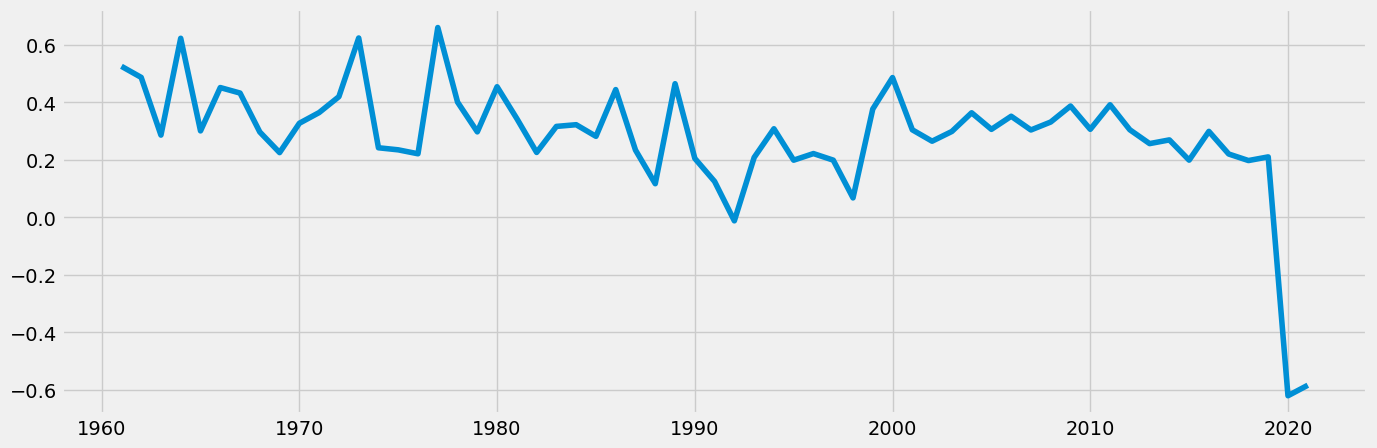

In [94]:
# check impact of differencing on time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(diff_lifexp)

In [95]:
# rerun dickey-fuller test

dickey_fuller(diff_lifexp)

Dickey-Fuller Stationarity test:
Test Statistic                 -2.913355
p-value                         0.043817
Number of Lags Used             0.000000
Number of Observations Used    60.000000
Critical Value (1%)            -3.544369
Critical Value (5%)            -2.911073
Critical Value (10%)           -2.593190
dtype: float64


In [96]:
# conduct 2nd differencing

diff2_lifexp = diff_lifexp - diff_lifexp.shift(1)

In [97]:
# remove missing values that occur due to differencing

diff2_lifexp.dropna(inplace = True)

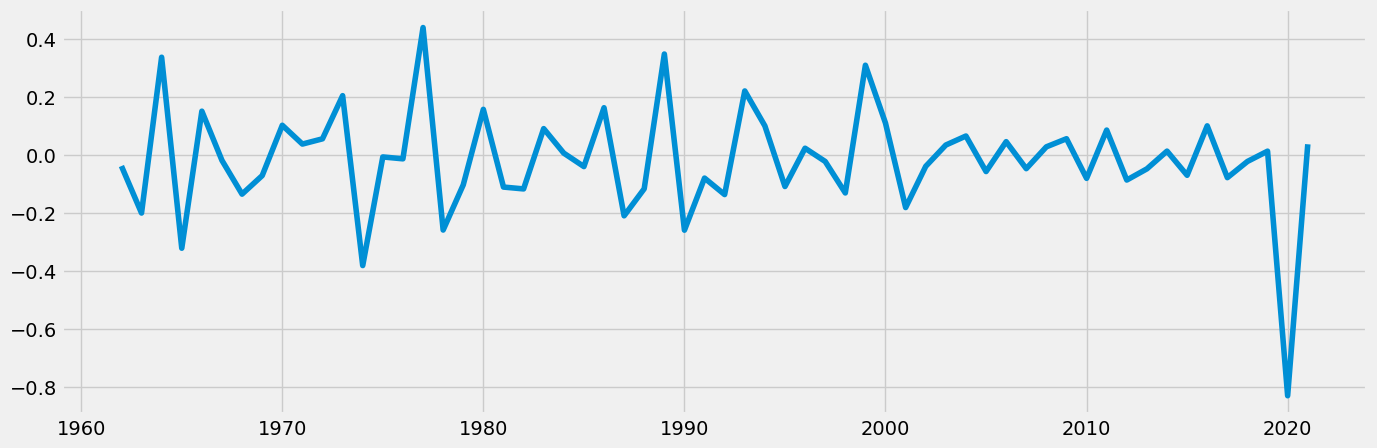

In [98]:
# check impact of differencing on time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(diff2_lifexp)

In [99]:
# rerun dickey-fuller test

dickey_fuller(diff2_lifexp)

Dickey-Fuller Stationarity test:
Test Statistic                -7.151253e+00
p-value                        3.136908e-10
Number of Lags Used            1.000000e+00
Number of Observations Used    5.800000e+01
Critical Value (1%)           -3.548494e+00
Critical Value (5%)           -2.912837e+00
Critical Value (10%)          -2.594129e+00
dtype: float64


### Discussion

The test statistic (-7.151253e+00) is smaller than the critical value at 5% significance (-2.912837e+00). Also, we have a p-value of less than .05 which means our test result is significant. Therefore we can reject the null hypothesis that there is a unit root in the time series and can conclude that our data is stationary.

#### Renewable energy consumption % time series

In [101]:
# the df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

diff_renew = df_renew - df_renew.shift(1)

In [102]:
# remove missing values that occur due to differencing

diff_renew.dropna(inplace = True)

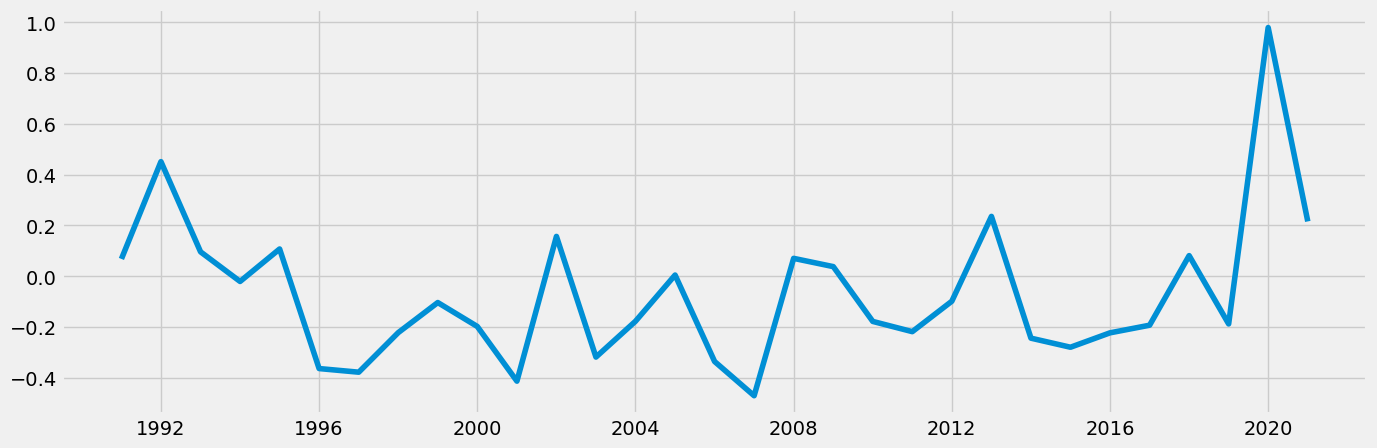

In [103]:
# check impact of differencing on time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(diff_renew)

In [104]:
# rerun dickey-fuller test

dickey_fuller(diff_renew)

Dickey-Fuller Stationarity test:
Test Statistic                 -4.400176
p-value                         0.000297
Number of Lags Used             0.000000
Number of Observations Used    30.000000
Critical Value (1%)            -3.669920
Critical Value (5%)            -2.964071
Critical Value (10%)           -2.621171
dtype: float64


### Discussion

The test statistic (-4.400176) is smaller than the critical value at 5% significance (-2.964071). Also, we have a p-value of less than .05 which means our test result is significant. Therefore we can reject the null hypothesis that there is a unit root in the time series and can conclude that our data is stationary.

#### Urban population % time series

In [106]:
# the df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

diff_urbpop = df_urbpop - df_urbpop.shift(1)

In [107]:
# remove missing values that occur due to differencing

diff_urbpop.dropna(inplace = True)

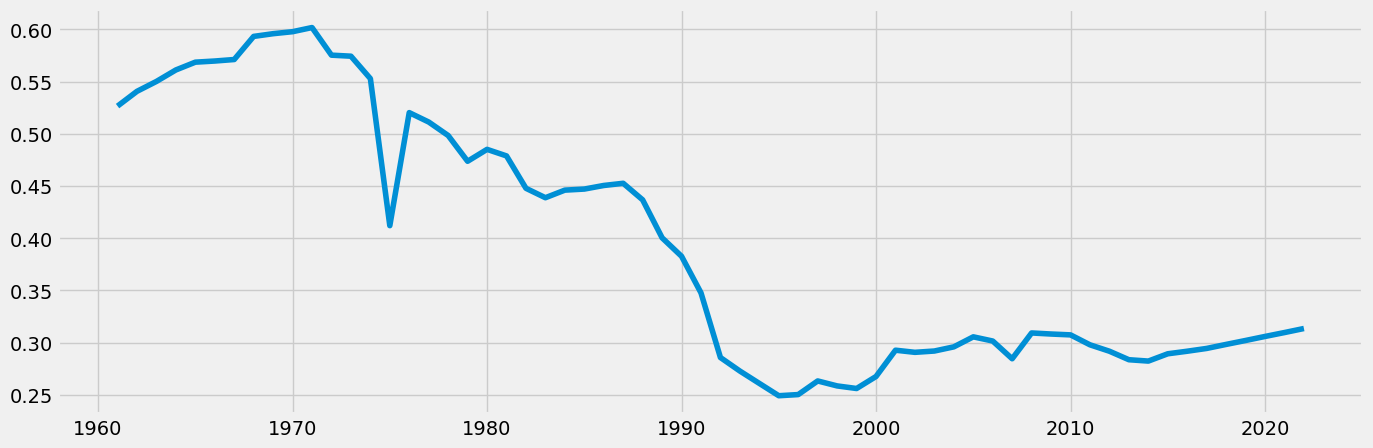

In [108]:
# check impact of differencing on time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(diff_urbpop)

In [109]:
# rerun dickey-fuller test

dickey_fuller(diff_urbpop)

Dickey-Fuller Stationarity test:
Test Statistic                 -1.067247
p-value                         0.727955
Number of Lags Used             1.000000
Number of Observations Used    60.000000
Critical Value (1%)            -3.544369
Critical Value (5%)            -2.911073
Critical Value (10%)           -2.593190
dtype: float64


In [110]:
# conduct 2nd differencing

diff2_urbpop = diff_urbpop - diff_urbpop.shift(1)

In [111]:
# remove missing values that occur due to differencing

diff2_urbpop.dropna(inplace = True)

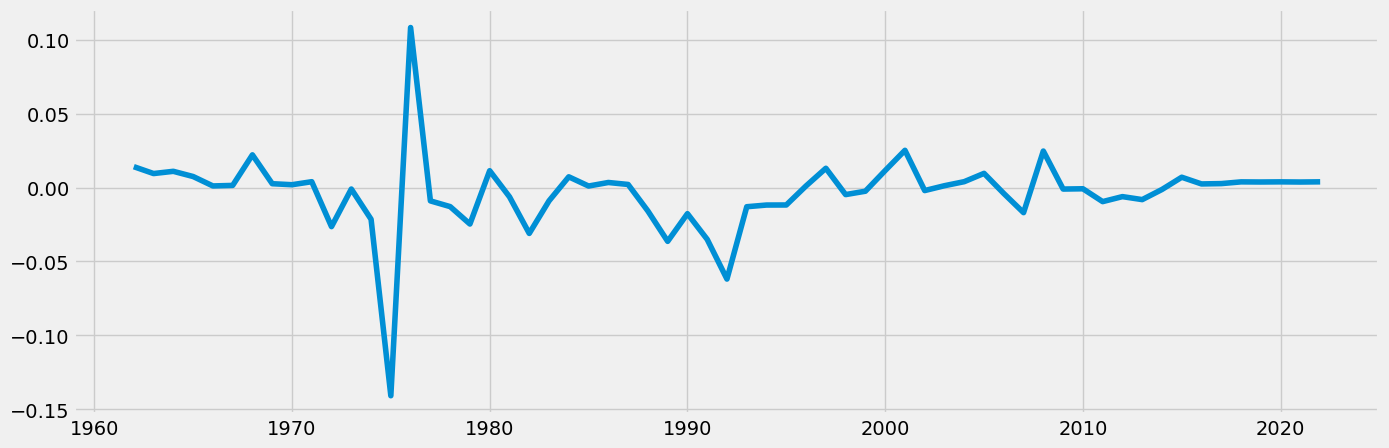

In [112]:
# check impact of differencing on time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(diff2_urbpop)

In [113]:
# rerun dickey-fuller test

dickey_fuller(diff2_urbpop)

Dickey-Fuller Stationarity test:
Test Statistic                -9.165990e+00
p-value                        2.459991e-15
Number of Lags Used            0.000000e+00
Number of Observations Used    6.000000e+01
Critical Value (1%)           -3.544369e+00
Critical Value (5%)           -2.911073e+00
Critical Value (10%)          -2.593190e+00
dtype: float64


### Discussion

After 2 rounds of differencing, the Dickey-Fuller test still shows the series to be non-stationary.

### 6. Checking autocorrelations

#### US median household income

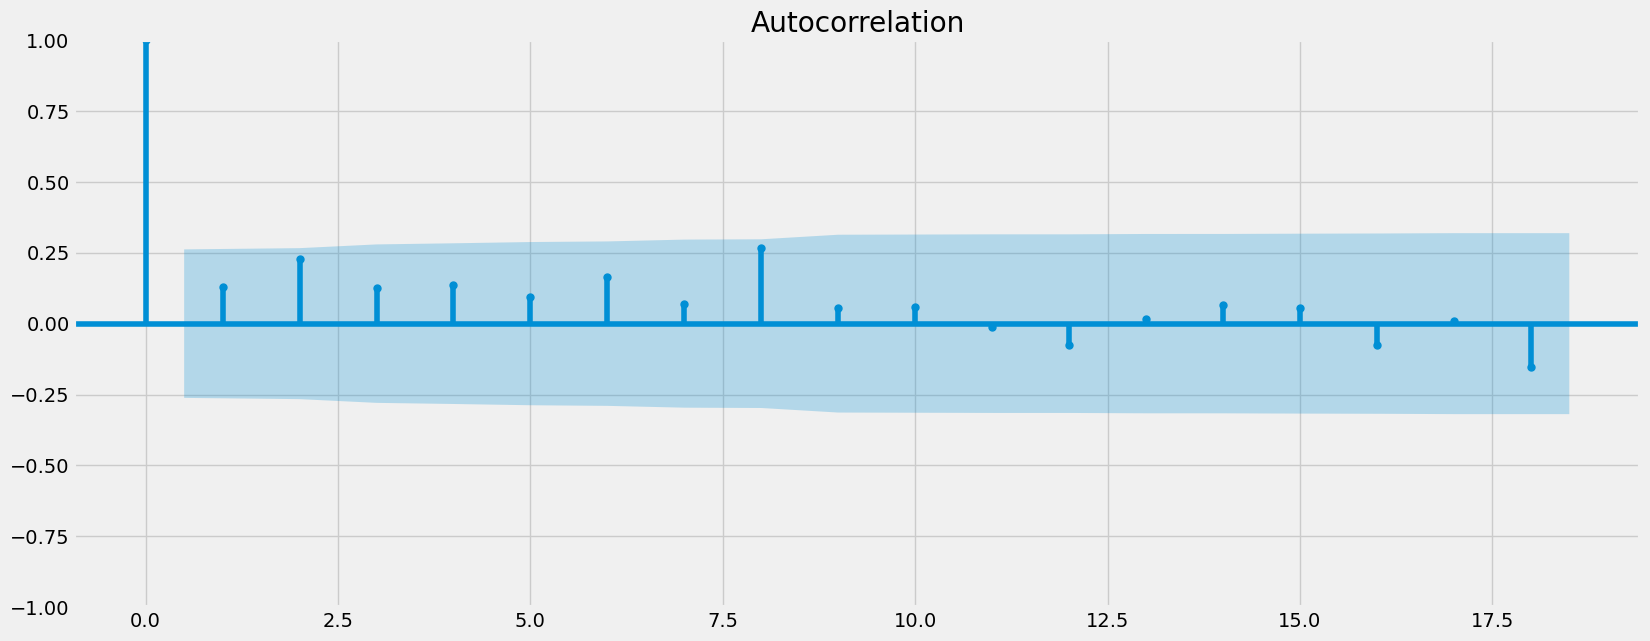

In [45]:
# check plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(diff_medinc)
plt.show()

### Discussion

Since we have only one correlated lag, we have verified that our data is now stationary.

#### Life expectancy time series

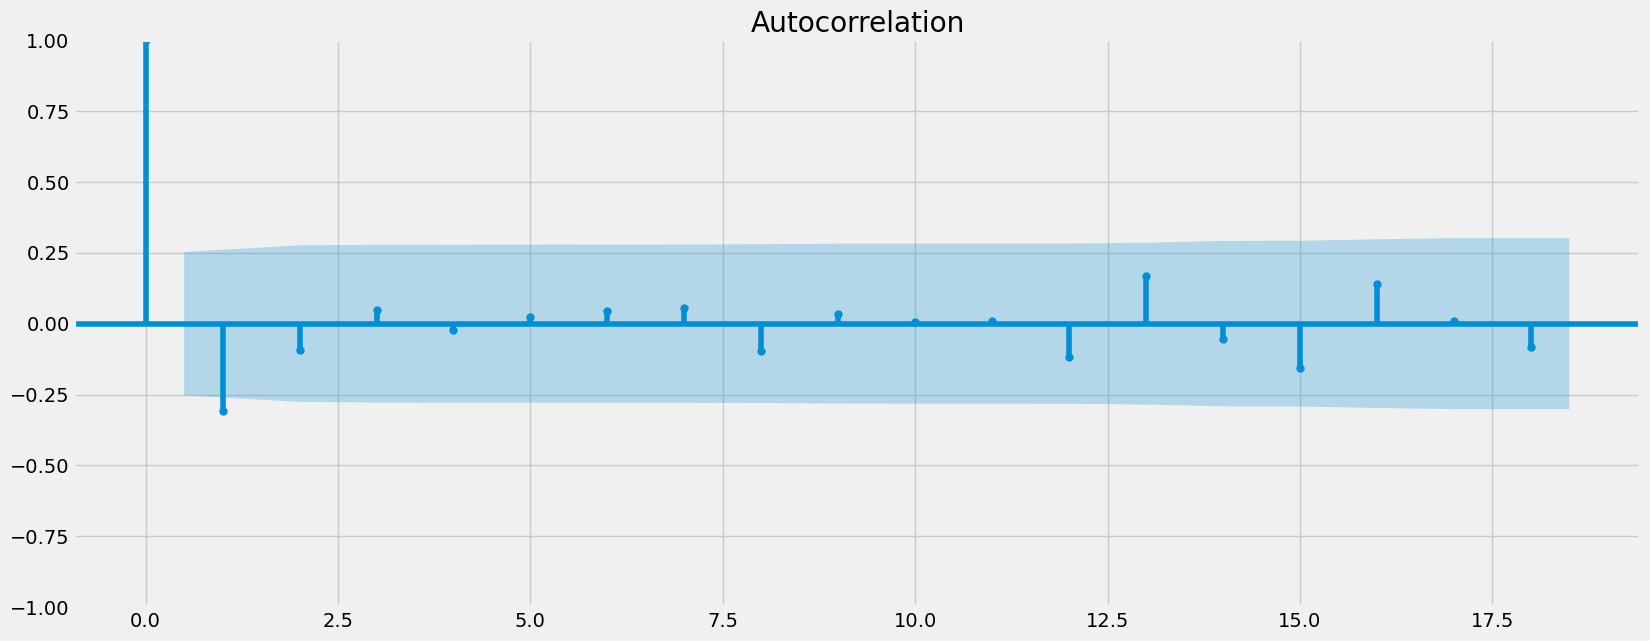

In [100]:
# check plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(diff2_lifexp)
plt.show()

### Discussion

Since we have few correlated lags, we have verified that our data is now stationary.

#### Renewable energy consumption % time series

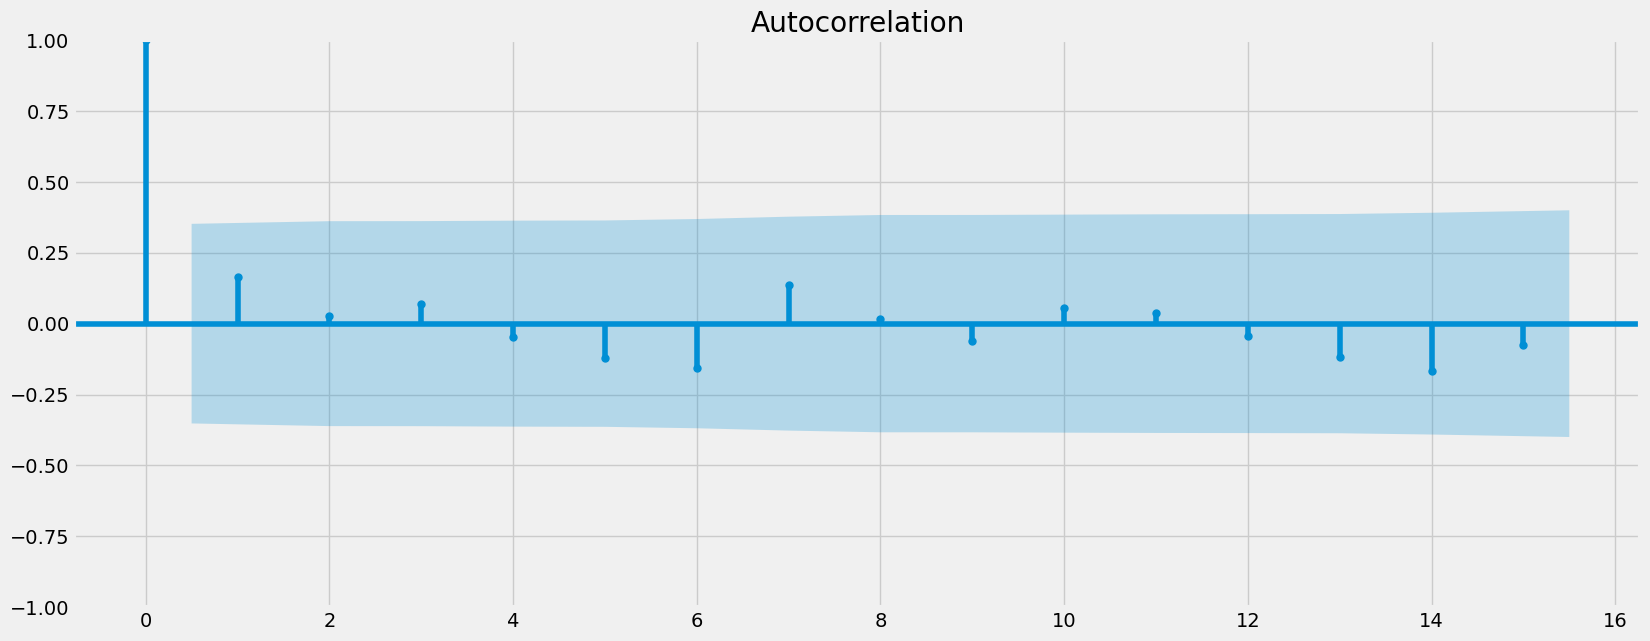

In [114]:
# check plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(diff_renew)
plt.show()

### Discussion

Since we have only one correlated lag, we have verified that our data is now stationary.

#### Infant mortality rate time series

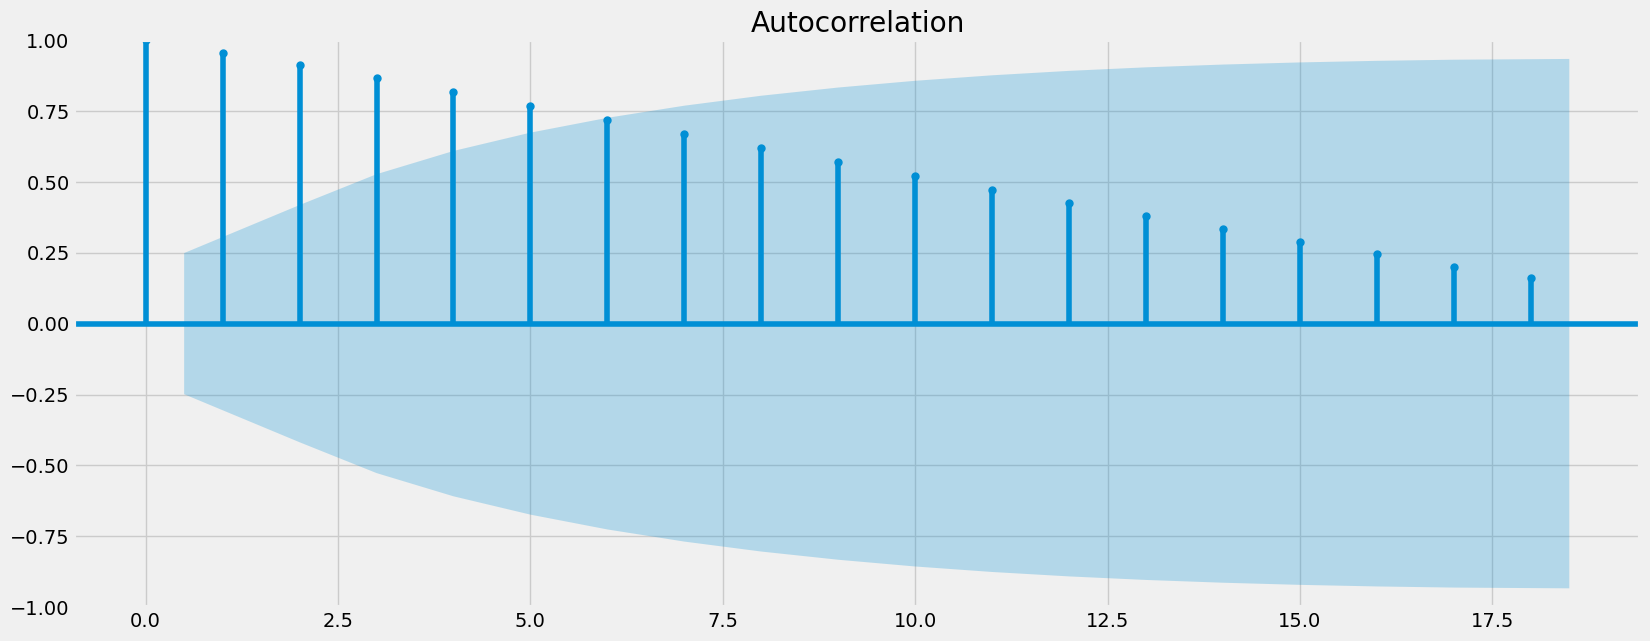

In [41]:
# check plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df_infmort)
plt.show()

### Discussion

We do have lags that are correlated with each other and therefore the data is somewhat autocorrelated. However, we can consider our data stationary enough since we there are less than 10 significantly correlated lags.